In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path=r"C:\Users\omkar\OneDrive\Documents\Data science\Naresh IT\Naresh IT\Datafiles\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

cat_cols=visa_df.select_dtypes(include='object').columns
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols,cat_cols

(Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'),
 Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'))

- Generally data has 3 types 

    - Postive skew

    - Negtaive skew

    - No skew

- Skew ness happend becuase of Outliers

- eventhough we treat the outliers still we can see some skew

- And we know that all the math developed by make an assumption as **Data follows Normal distribution**

- so transformation methods used to convert data to Normal

- The important Transformations are

    - Log Transformation

    - Reciprocal Transformation

    - Sqrt Transformation

    - Exponential Transformation

    - Power Transformation

$Step-1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$Step-2$: **read exponential data**

In [2]:
exp_data=np.random.exponential(size=10000)
exp_data

array([2.01643816, 0.15822278, 1.2141394 , ..., 0.66750998, 0.63136418,
       0.32198458])

$Step-3$: **plot histogram**

(array([5.516e+03, 2.502e+03, 1.107e+03, 5.040e+02, 1.960e+02, 9.300e+01,
        5.400e+01, 1.800e+01, 4.000e+00, 6.000e+00]),
 array([6.08181212e-05, 8.11280319e-01, 1.62249982e+00, 2.43371932e+00,
        3.24493882e+00, 4.05615832e+00, 4.86737782e+00, 5.67859732e+00,
        6.48981682e+00, 7.30103633e+00, 8.11225583e+00]),
 <BarContainer object of 10 artists>)

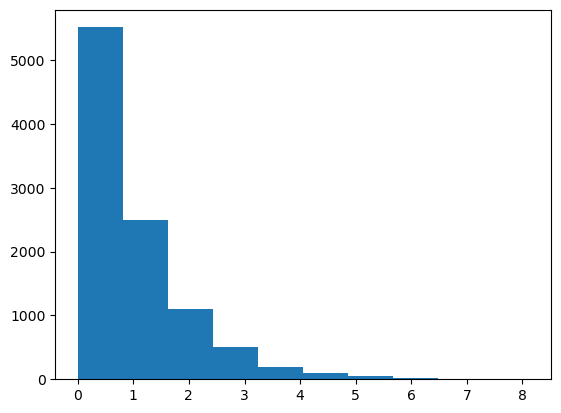

In [3]:
plt.hist(exp_data)

<Axes: ylabel='Density'>

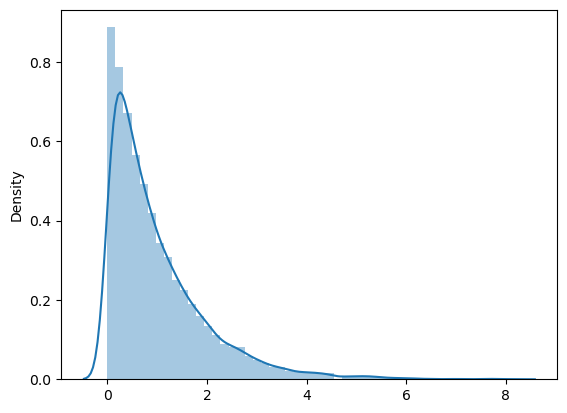

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(exp_data)

In [5]:
normal_data=np.random.normal(size=100000)
normal_data

array([0.0053076 , 0.55811957, 0.38209177, ..., 1.04791773, 0.50780721,
       0.08281065])

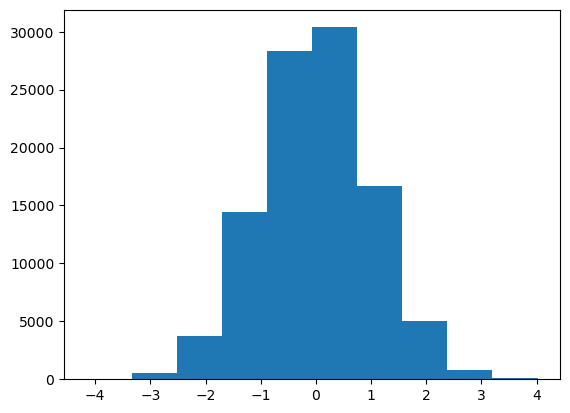

In [6]:
plt.hist(normal_data)
plt.show()

**Goal:**

- Convert Exponential data to Normal data


**Log Transformation**

- Log transformation means performing logarithm operations on original data

- It is one of the approach to convert data to Normality

- Log means natural logarithm base=e

In [7]:
x=2
np.log(x)

0.6931471805599453

In [8]:
log_data=np.log(exp_data)
log_data

array([ 0.70133267, -1.84375124,  0.19403551, ..., -0.40420094,
       -0.45987244, -1.13325161])

In [ ]:
# we are hoping log data might follows normality
# it might be possible or might not be possible
# we need to plot histogram again on log data 

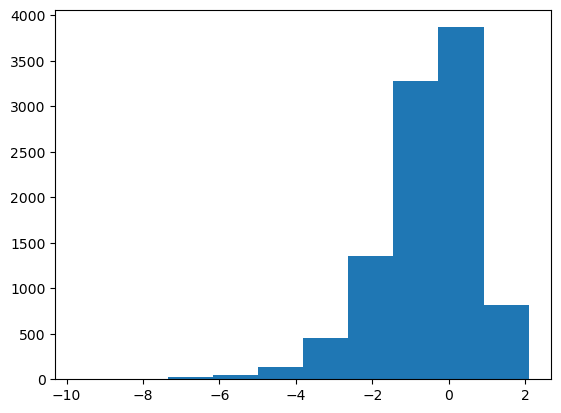

In [10]:
plt.hist(log_data)
plt.show()

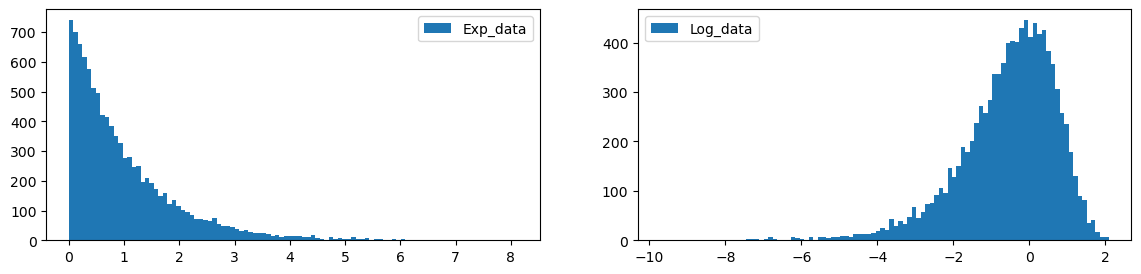

In [17]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(exp_data,bins=100,label='Exp_data')
plt.legend()
plt.subplot(1,2,2).hist(log_data,bins=100,label='Log_data')
plt.legend()
plt.show()

**Square root Transformation: np.sqrt**

In [18]:
sqrt_data=np.sqrt(exp_data)
sqrt_data

array([1.42001344, 0.39777227, 1.10187994, ..., 0.81701284, 0.79458428,
       0.56743685])

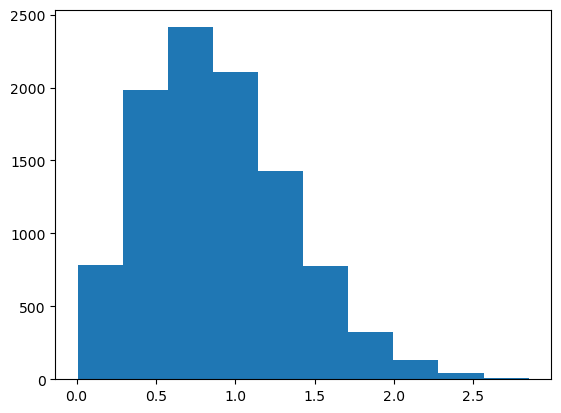

In [19]:
plt.hist(sqrt_data)
plt.show()

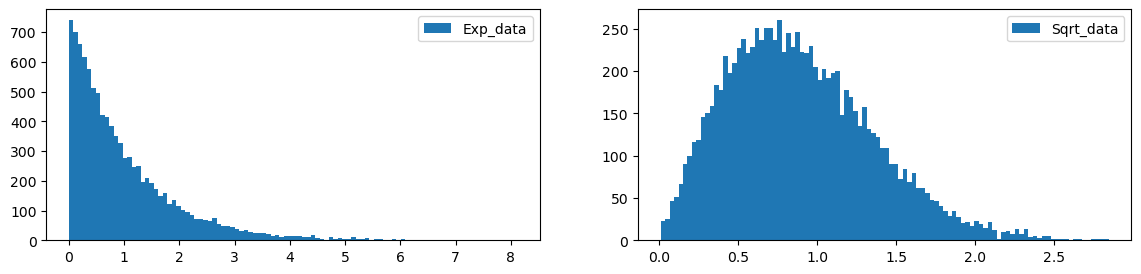

In [20]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(exp_data,bins=100,label='Exp_data')
plt.legend()
plt.subplot(1,2,2).hist(sqrt_data,bins=100,label='Sqrt_data')
plt.legend()
plt.show()

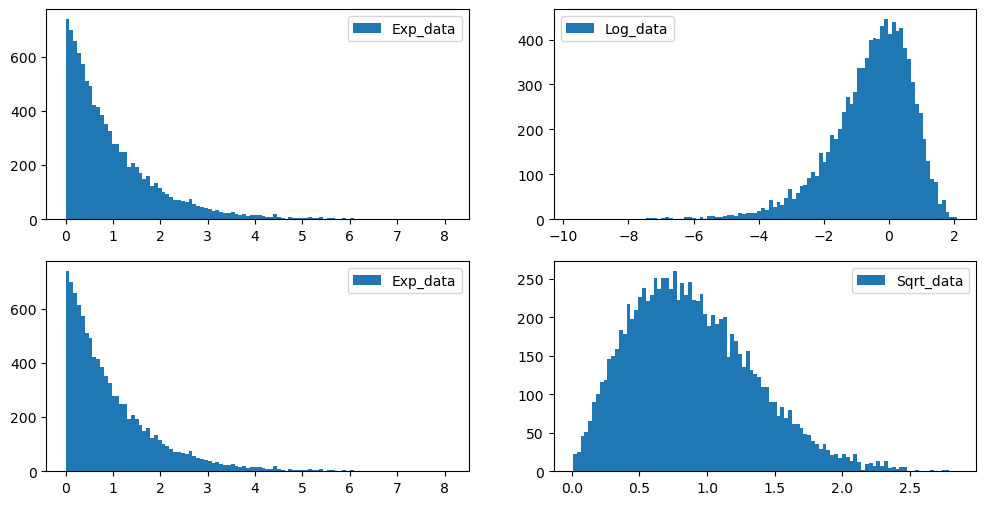

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1).hist(exp_data,bins=100,label='Exp_data')
plt.legend()
plt.subplot(2,2,2).hist(log_data,bins=100,label='Log_data')
plt.legend()
plt.subplot(2,2,3).hist(exp_data,bins=100,label='Exp_data')
plt.legend()
plt.subplot(2,2,4).hist(sqrt_data,bins=100,label='Sqrt_data')
plt.legend()
plt.show()

**Power Transformation**

- Power Transformation is used to Reduce the skewnes , so that distribution become symmetric

- Under these two types are there

    - Box-cox Transformation

    - It applies to only postive data

    - It has both Log transformation and square root transformation

<img src="https://miro.medium.com/v2/resize:fit:884/1*_nHvGg-OQYtNSSZph-424g.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 884px; height: 168px; margin: 0px; width: 351px;" alt="Box-Cox Transformation.. The real-world data is not always… | by Ronak  Chhatbar | Medium" jsname="kn3ccd" aria-hidden="false">

  - lambda =1 : No Transformation

  - lambda = 0 : Log Transformation

  - lambda =0.5 : Square root transformation

In [ ]:
**Your job is know about another method**

Yeo-Johnson ===== formaule tricky confused tomorrow i will ask you

- Power transformations are under sklearn package

- sklearn

    - preprocessing

        - PowerTransformation

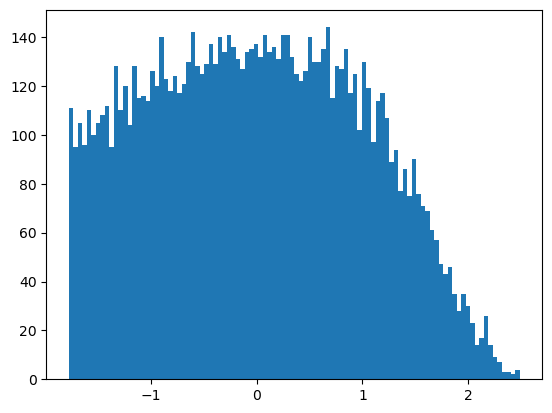

In [29]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
exp_data=exp_data.reshape(-1,1)
trans_exp=pt.fit_transform(exp_data)
plt.hist(trans_exp,bins=100)
plt.show()

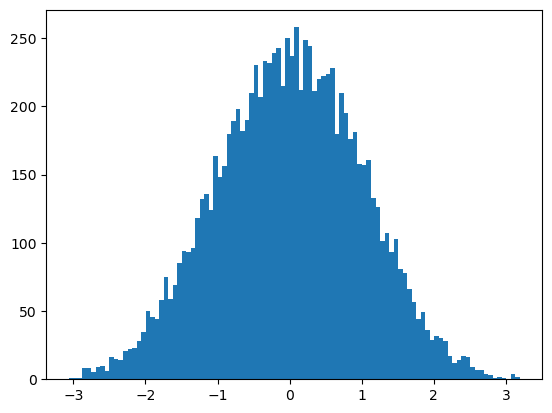

In [30]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='box-cox')
exp_data=exp_data.reshape(-1,1)
trans_exp=pt.fit_transform(exp_data)
plt.hist(trans_exp,bins=100)
plt.show()

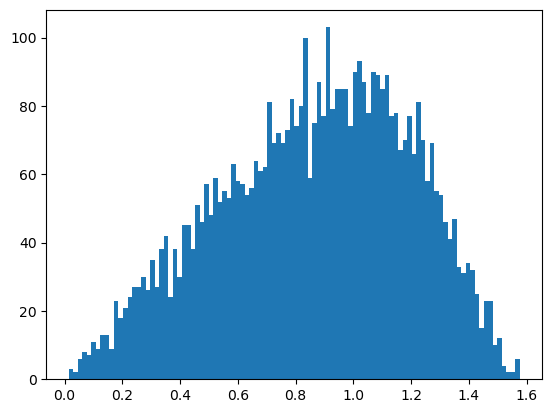

In [32]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
exp_data=exp_data.reshape(-1,1)
trans_exp=pt.fit_transform(exp_data)
trans_sqrt=np.sqrt(trans_exp)
plt.hist(trans_sqrt,bins=100)
plt.show()